# Individual Algorithms Applied

In this section, we apply various algorithms to predict survival based on selected features from the Titanic dataset.

## Selected Features

The features used for model training are:

- **survived**: Indicates whether the passenger survived (1) or not (0) *(Target Variable)*
- **pclass**: Passenger class (1st, 2nd, 3rd)
- **sex**: Gender of the passenger
- **age**: Age of the passenger
- **sibsp**: Number of siblings or spouses aboard
- **parch**: Number of parents or children aboard
- **fare**: Ticket fare paid by the passenger
- **embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- **class**: Passenger class (1st, 2nd, 3rd)
- **who**: Gender group (man, woman, child)
- **adult_male**: Indicates if the passenger is an adult male (1 = Yes, 0 = No)
- **deck**: Deck where the cabin is located
- **embark_town**: Town of embarkation
- **alive**: Indicates whether the passenger is alive (1) or not (0)
- **alone**: Indicates whether the passenger is alone (1) or not (0)

## Target Variable

- **survived**: This is the target variable we aim to predict using the selected features.


In [1]:
# !pip install catboost

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
# data import titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# pre-processing


In [ ]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [5]:
# impute missing values using knn imputers in age
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

# impute embarked missing values using pandas
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
# drop deck column
df.drop('deck', axis=1, inplace=True)

# df missing values
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [7]:
# convert each category column to category
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# add this as a new column in the dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

In [8]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    category
 1   embarked     891 non-null    category
 2   class        891 non-null    category
 3   who          891 non-null    category
 4   embark_town  891 non-null    category
 5   alive        891 non-null    category
dtypes: category(6)
memory usage: 6.1 KB


In [9]:
# split data into X and y
X = df.drop('survived', axis=1)
y = df['survived']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Simple Decesion tree**

In [10]:
# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Ensure the same columns in train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# create the model
dt_model = DecisionTreeClassifier(random_state=42)

# train the model
dt_model.fit(X_train_encoded, y_train)

# predictions
y_pred_dt = dt_model.predict(X_test_encoded)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_dt)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred_dt)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_dt)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## **Catboost classifier**

In [11]:
# run the catboost classifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=3,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)

# train the model
model.fit(X_train, y_train, cat_features=categorical_cols.tolist())

# predictions
y_pred = model.predict(X_test)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## **RandomForestClassifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier

# create the model
rf_model = RandomForestClassifier(random_state=42)

# train the model
rf_model.fit(X_train_encoded, y_train)

# predictions
y_pred_rf = rf_model.predict(X_test_encoded)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred_rf)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_rf)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## **AdaBoostClassifier**

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# create the model
ada_model = AdaBoostClassifier(random_state=42)

# train the model
ada_model.fit(X_train_encoded, y_train)

# predictions
y_pred_ada = ada_model.predict(X_test_encoded)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_ada)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred_ada)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_ada)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## **xgb**

In [14]:
import xgboost as xgb

# !pip install xgboost


# create the model
xgb_model = xgb.XGBClassifier(random_state=42)

# train the model
xgb_model.fit(X_train_encoded, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test_encoded)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred_xgb)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_xgb)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## **Comparison**

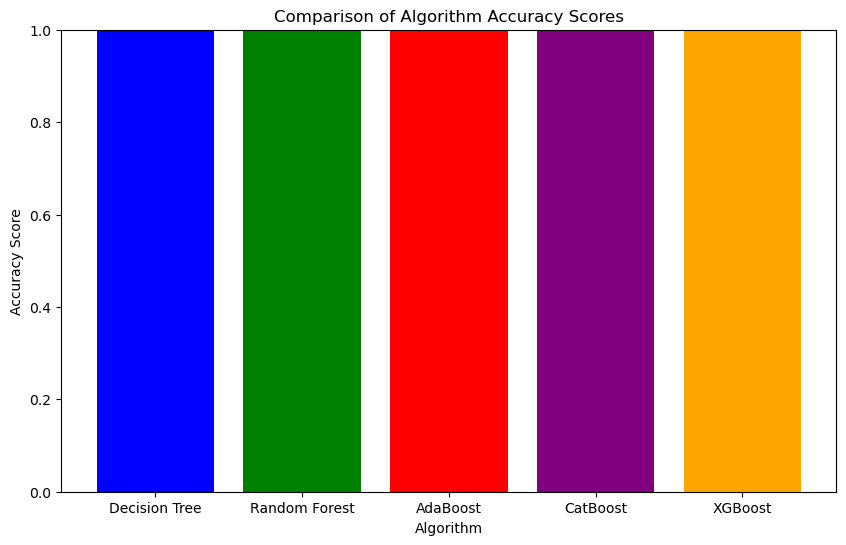

In [15]:
# Accuracy scores of each model
accuracy_scores = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'AdaBoost': accuracy_score(y_test, y_pred_ada),
    'CatBoost': accuracy_score(y_test, y_pred),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Algorithm Accuracy Scores')
plt.ylim(0, 1)
plt.show()


# All Algorithms

## Select Features and Target

In this section, we define the features and the target variable for our model.

### Features
The selected features from the dataset are:
- **pclass**: Passenger class (1st, 2nd, 3rd)
- **sex**: Gender of the passenger
- **age**: Age of the passenger
- **sibsp**: Number of siblings or spouses aboard
- **parch**: Number of parents or children aboard
- **fare**: Ticket fare paid by the passenger

### Target Variable
The target variable is:
- **survived**: Indicates whether the passenger survived (1) or not (0)


C:\Users\Hp\AppData\Local\Temp\ipykernel_34288\3135495894.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_34288\3135495894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
c:\Users\Hp\miniconda3\en

Model Accuracies:
Decision Tree: 0.77
Random Forest: 0.79
AdaBoost: 0.77
XGBoost: 0.81
CatBoost: 0.82
Voting Ensemble: 0.80


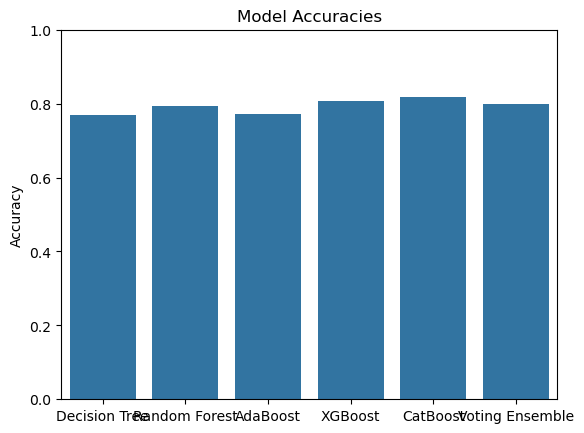

In [16]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select features and target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

# Handle missing values (for simplicity, fill missing 'age' values with the median)
X['age'].fillna(X['age'].median(), inplace=True)

# Define categorical and numerical columns
categorical_cols = ['pclass', 'sex']
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Create models
models = {
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', RandomForestClassifier(random_state=42))]),
    'AdaBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))]),
    'CatBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', CatBoostClassifier(silent=True, random_state=42))]),
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit models and evaluate accuracy
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Create an ensemble model using VotingClassifier
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
results['Voting Ensemble'] = voting_accuracy

# Display the results
print("Model Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")

# Visualize the results
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show();
